In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data=pd.read_csv('Automobile_insurance_fraud.csv',na_values='?',parse_dates=['policy_bind_date','incident_date'])
Data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Here we have to work on Automobile insurance fraud data where the target is fraud_report in which we predict that the person claiming the insurance amount is real or fraud.

# Exploratory Data Analysis

In [3]:
Data.shape

(1000, 40)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null datetime64[ns]
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_

In [5]:
Data.drop(['_c39'],axis=1,inplace=True)
Data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [6]:
Data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


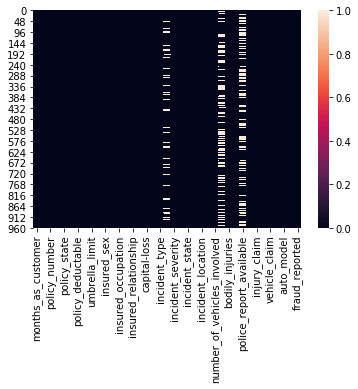

In [7]:
null=Data.isnull()
sns.heatmap(null)

Incident Type,Number of vehicles involved and police-report-available have NaN values.

In [8]:
Data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [9]:
Data.property_damage.value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [10]:
Data.police_report_available.value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [11]:
#Imputing the null values with constant because we can't assign most_frequent as the number of values are very close.
list=['collision_type','property_damage','police_report_available']
from sklearn.impute import SimpleImputer
sc=SimpleImputer(strategy='constant')
for i in list:
    Data[i]=sc.fit_transform(Data[i].values.reshape(-1,1))

In [12]:
Data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
missing_value      178
Name: collision_type, dtype: int64

In [13]:
Data.property_damage.value_counts()

missing_value    360
NO               338
YES              302
Name: property_damage, dtype: int64

In [14]:
Data.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [15]:
#As this is the Targrt here in the dataset.Lets map it.
Data['fraud_reported']=Data['fraud_reported'].map({'Y':0,'N':1})
Data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,0
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,missing_value,5070,780,780,3510,Mercedes,E400,2007,0
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,1
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,0
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,missing_value,87200,17440,8720,61040,Honda,Accord,2006,1
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,3,missing_value,108480,18080,18080,72320,Volkswagen,Passat,2015,1
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,1
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,1


Uni and Bivariate Analysis

In [16]:
Data.policy_state.value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

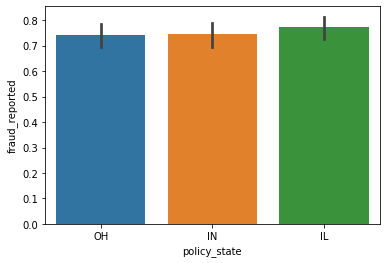

In [17]:
sns.barplot(y='fraud_reported',x='policy_state',data=Data)

Among the states 'IL' has more fraud_report compared two other 2 states.

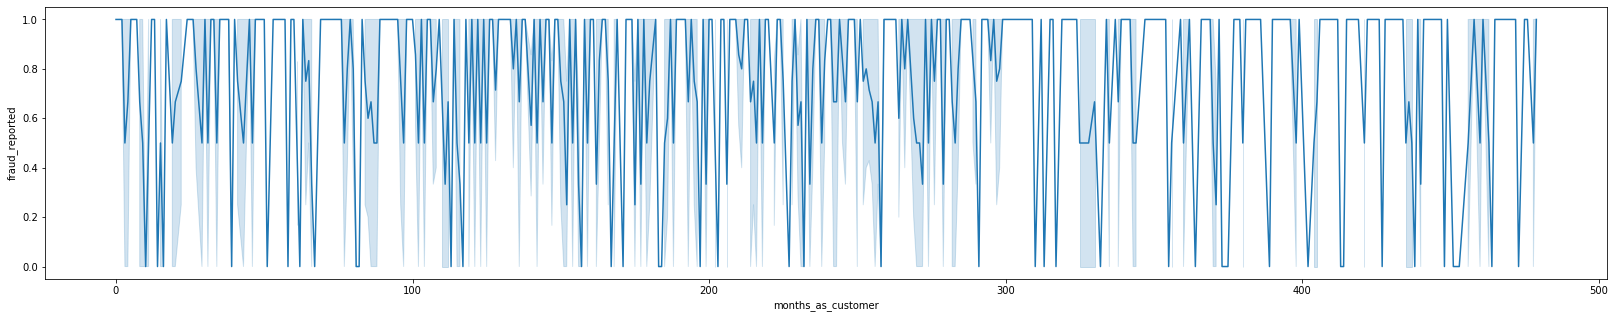

In [18]:
plt.figure(figsize=(28,5))
sns.lineplot(y='fraud_reported',x='months_as_customer',data=Data)

fraud report not depends on months as customer means old and new customers can do fraud.

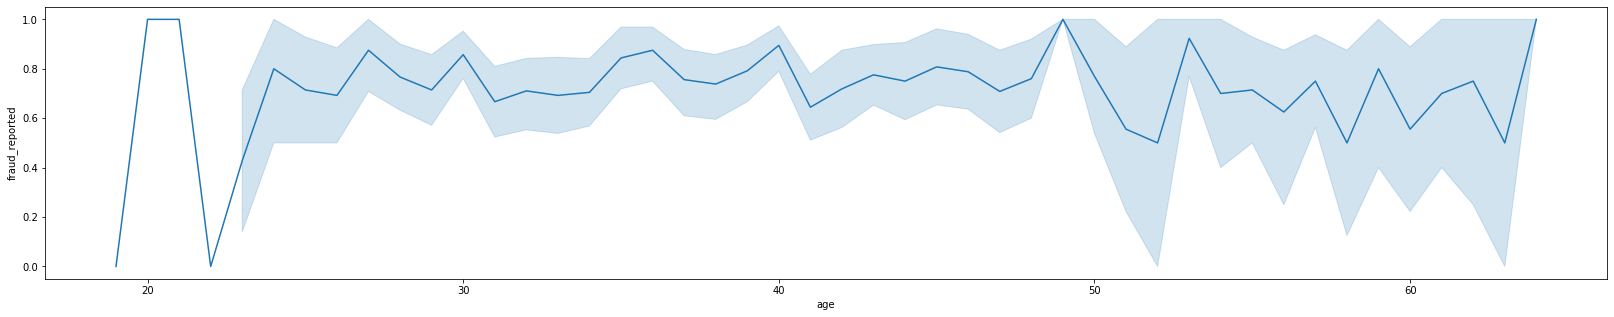

In [19]:
plt.figure(figsize=(28,5))
sns.lineplot(x='age',y='fraud_reported',data=Data)

All the age range people can make fraud_report but At the age of 20-22 people make more fraud.

In [20]:
pDate=pd.DataFrame()
pDate['Year']=Data['policy_bind_date'].dt.year
pDate['Month']=Data['policy_bind_date'].dt.month_name()
pDate['Day']=Data['policy_bind_date'].dt.day
pDate['Fraud_report']=Data['fraud_reported']
pDate

,Year,Month,Day,Fraud_report
0,2014,October,17,0
1,2006,June,27,0
2,2000,June,9,1
3,1990,May,25,0
4,2014,June,6,1
...,...,...,...,...
995,1991,July,16,1
996,2014,May,1,1
997,2003,February,17,1
998,2011,November,18,1


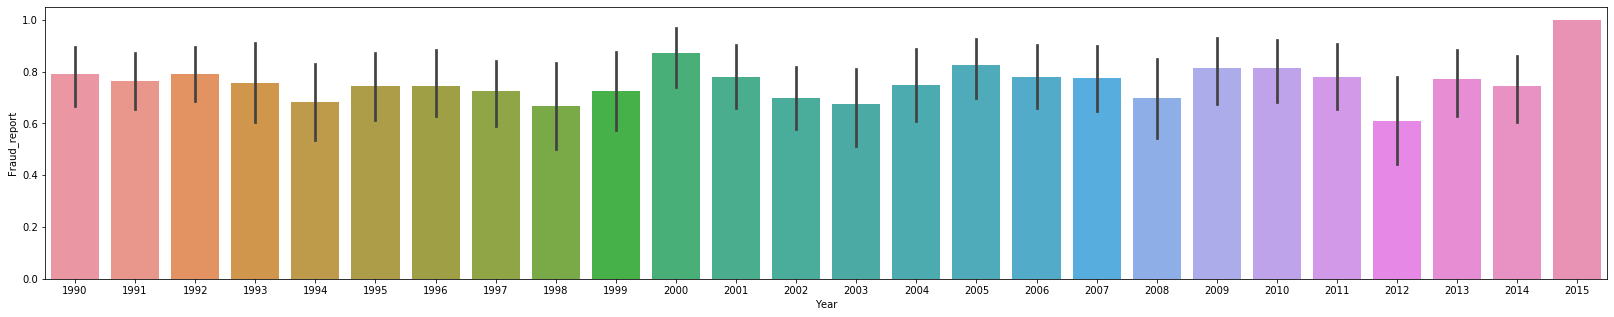

In [21]:
plt.figure(figsize=(28,5))
sns.barplot(x='Year',y='Fraud_report',data=pDate)

It is the Automobile insurance data from 1990 to 2015. The insurance with bind year 2015 has heighest fraud_report and 2012 has lowest.

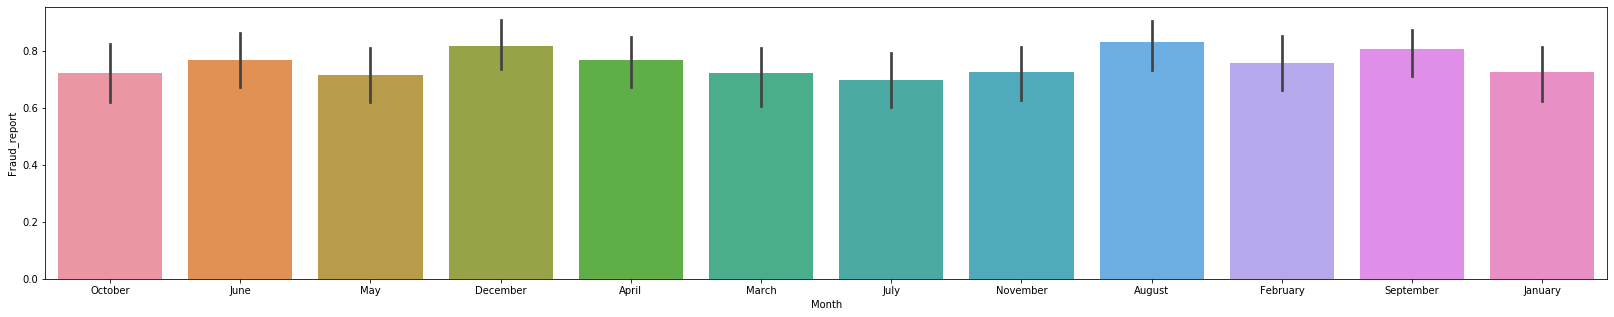

In [22]:
plt.figure(figsize=(28,5))
sns.barplot(x='Month',y='Fraud_report',data=pDate)

the Insurance bind months of December,August,September have heighest fraud_reported .

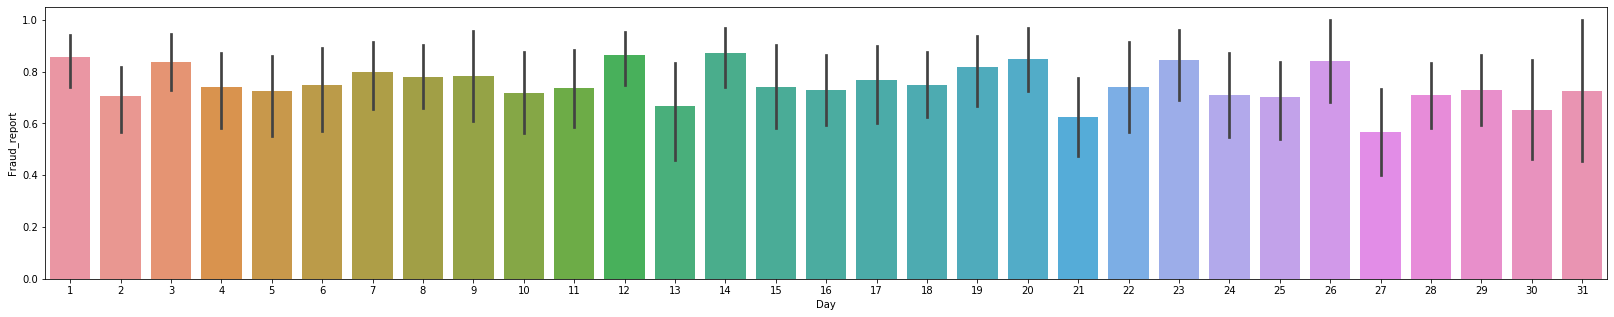

In [23]:
plt.figure(figsize=(28,5))
sns.barplot(x='Day',y='Fraud_report',data=pDate)

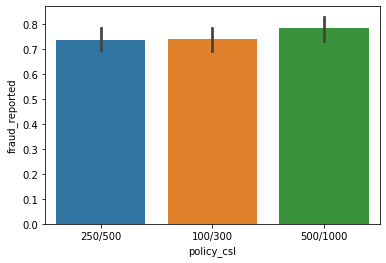

In [24]:
#policy_csl
sns.barplot(x='policy_csl',y='fraud_reported',data=Data)

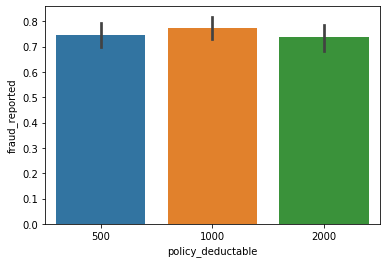

In [25]:
#policy_deductable
sns.barplot(x='policy_deductable',y='fraud_reported',data=Data)

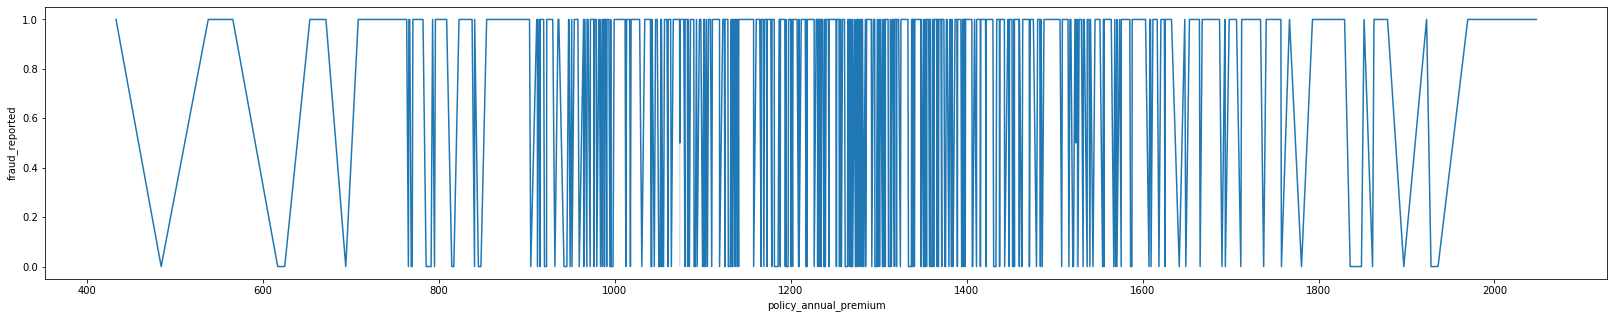

In [26]:
plt.figure(figsize=(28,5))
sns.lineplot(x='policy_annual_premium',y='fraud_reported',data=Data)

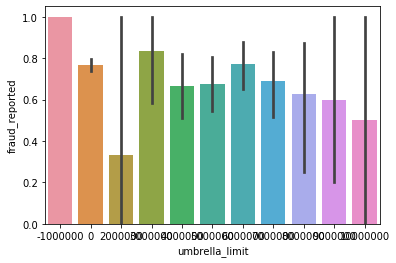

In [27]:
#umbrella_limit
sns.barplot(x='umbrella_limit',y='fraud_reported',data=Data)

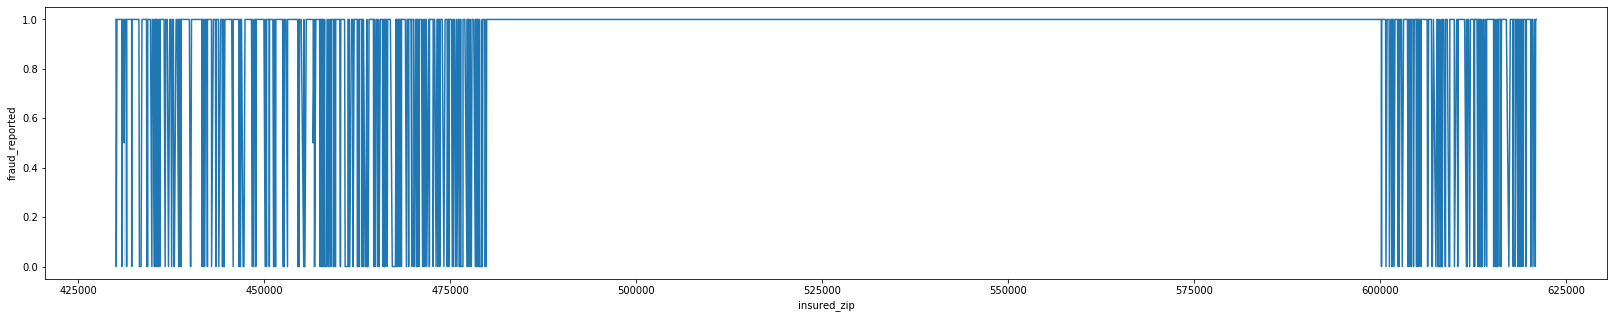

In [28]:
plt.figure(figsize=(28,5))
sns.lineplot(x='insured_zip',y='fraud_reported',data=Data)

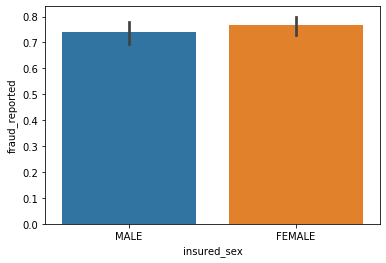

In [29]:
sns.barplot(x='insured_sex',y='fraud_reported',data=Data)

In [30]:
Data['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

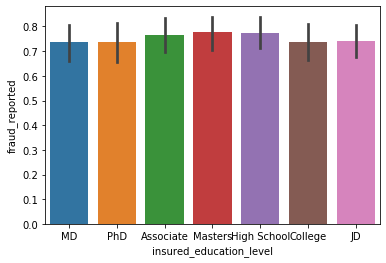

In [31]:
##insured_education_level 
sns.barplot(x='insured_education_level',y='fraud_reported',data=Data)

In [32]:
Data['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

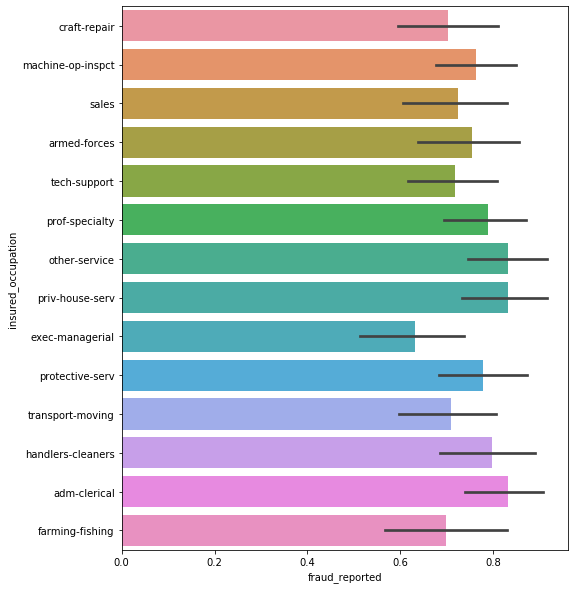

In [33]:
#insured_occupation 
plt.figure(figsize=(8,10))
sns.barplot(y='insured_occupation',x='fraud_reported',data=Data)

If we see occupationwise fraud report then adm-clericals have more fraud reports.

In [34]:
#insured_hobbies
Data['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

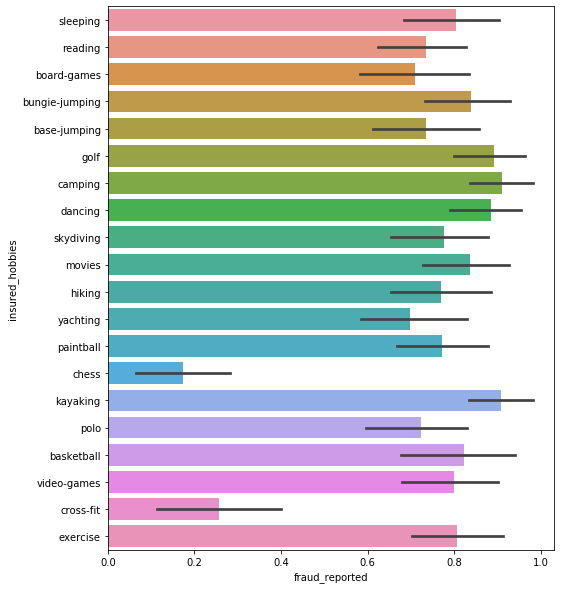

In [35]:
plt.figure(figsize=(8,10))
sns.barplot(y='insured_hobbies',x='fraud_reported',data=Data)

Peoples with hobbies Chess and cross-fit have very less fraud reported as compared to others.

In [36]:
#Incident_Date
iDate=pd.DataFrame()
iDate['Year']=Data['incident_date'].dt.year
iDate['Month']=Data['incident_date'].dt.month_name()
iDate['Day']=Data['incident_date'].dt.day_name()
iDate['Fraud_report']=Data['fraud_reported']
iDate

,Year,Month,Day,Fraud_report
0,2015,January,Sunday,0
1,2015,January,Wednesday,0
2,2015,February,Sunday,1
3,2015,October,Thursday,0
4,2015,February,Tuesday,1
...,...,...,...,...
995,2015,February,Sunday,1
996,2015,January,Saturday,1
997,2015,January,Friday,1
998,2015,February,Thursday,1


In [37]:
iDate['Year'].value_counts()

2015    1000
Name: Year, dtype: int64

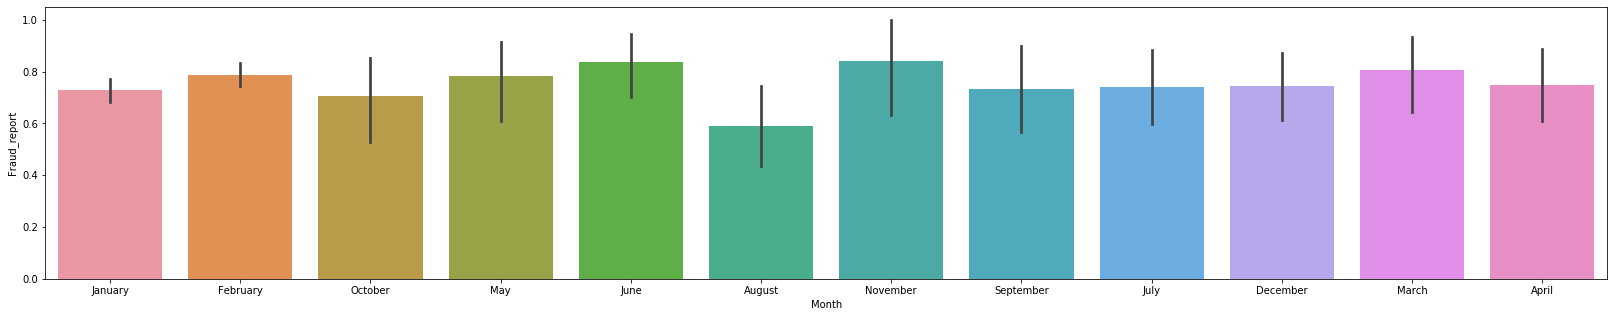

In [38]:
plt.figure(figsize=(28,5))
sns.barplot(x='Month',y='Fraud_report',data=iDate)

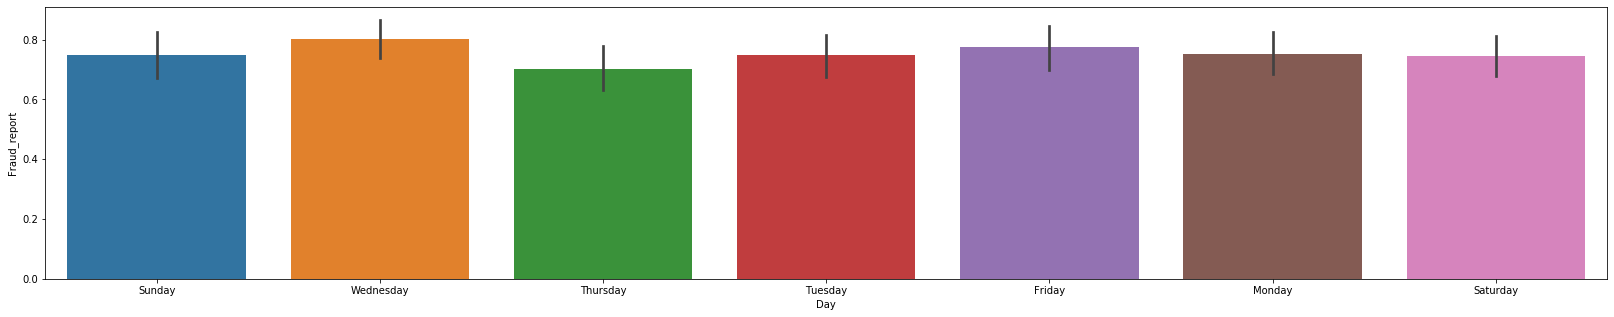

In [39]:
plt.figure(figsize=(28,5))
sns.barplot(x='Day',y='Fraud_report',data=iDate)

In [40]:
#incident_type
Data['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

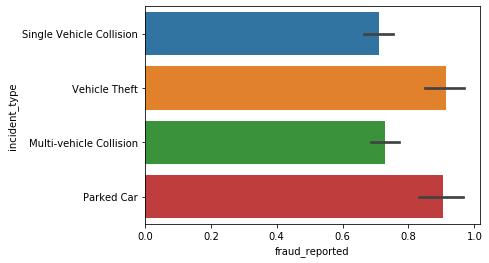

In [41]:
#incident_type 
sns.barplot(y='incident_type',x='fraud_reported',data=Data)

There are four types of incident in which one can claim Insurance among them Multi-vehicle Collision and Single Vehicle Collision occured mostly but Vehicle Thift and Parked Car reported more fraud. 

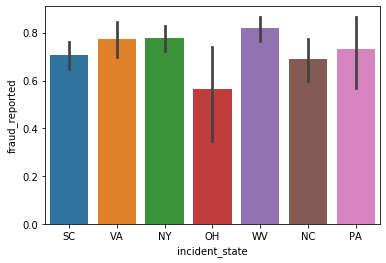

In [42]:
# incident_state 
sns.barplot(y='fraud_reported',x='incident_state',data=Data)

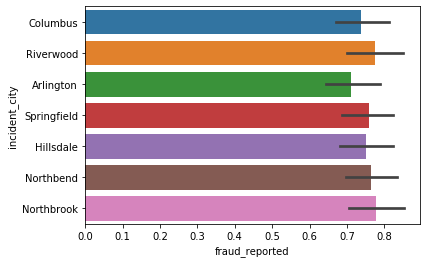

In [43]:
#incident_city
sns.barplot(x='fraud_reported',y='incident_city',data=Data)

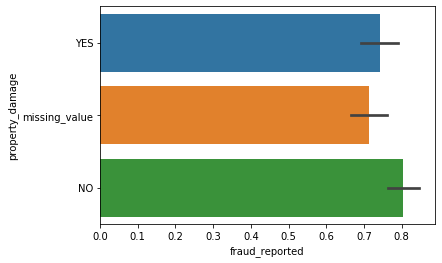

In [44]:
sns.barplot(x='fraud_reported',y='property_damage',data=Data)

more fraud_repoted when no property have damages.

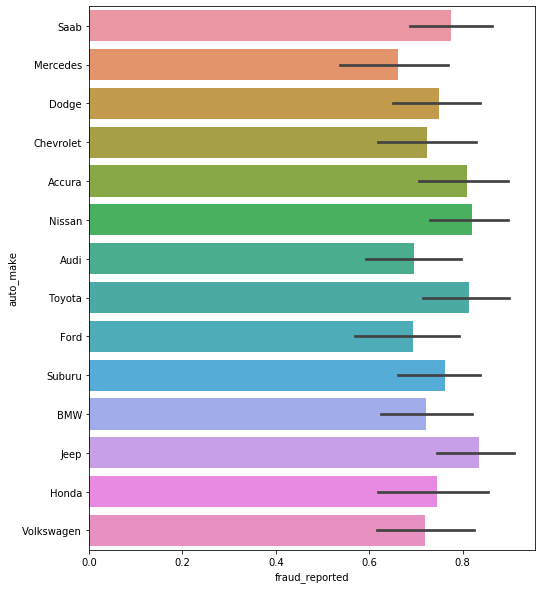

In [45]:
#auto_make 
plt.figure(figsize=(8,10))
sns.barplot(y='auto_make',x='fraud_reported',data=Data)

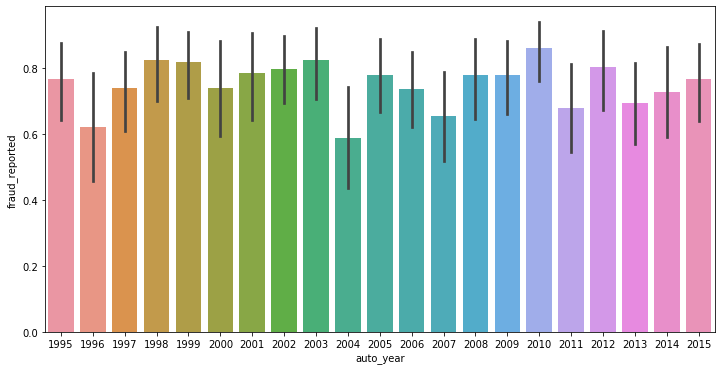

In [46]:
#auto_year
plt.figure(figsize=(12,6))
sns.barplot(x='auto_year',y='fraud_reported',data=Data)

Fraud_reported is highest in the vehicle manufactered in 2010

In [47]:
#Lets drop some redundant columns
list=['policy_number','policy_bind_date','incident_date']
Data=Data.drop(list,axis=1)
Data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,0
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,missing_value,5070,780,780,3510,Mercedes,E400,2007,0
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,1
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,0
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,1


In [48]:
#Encoding the categorical values
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
cat_cols=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model']
for i in cat_cols:
    Data[i]=Le.fit_transform(Data[i])

# Checking the Correlation

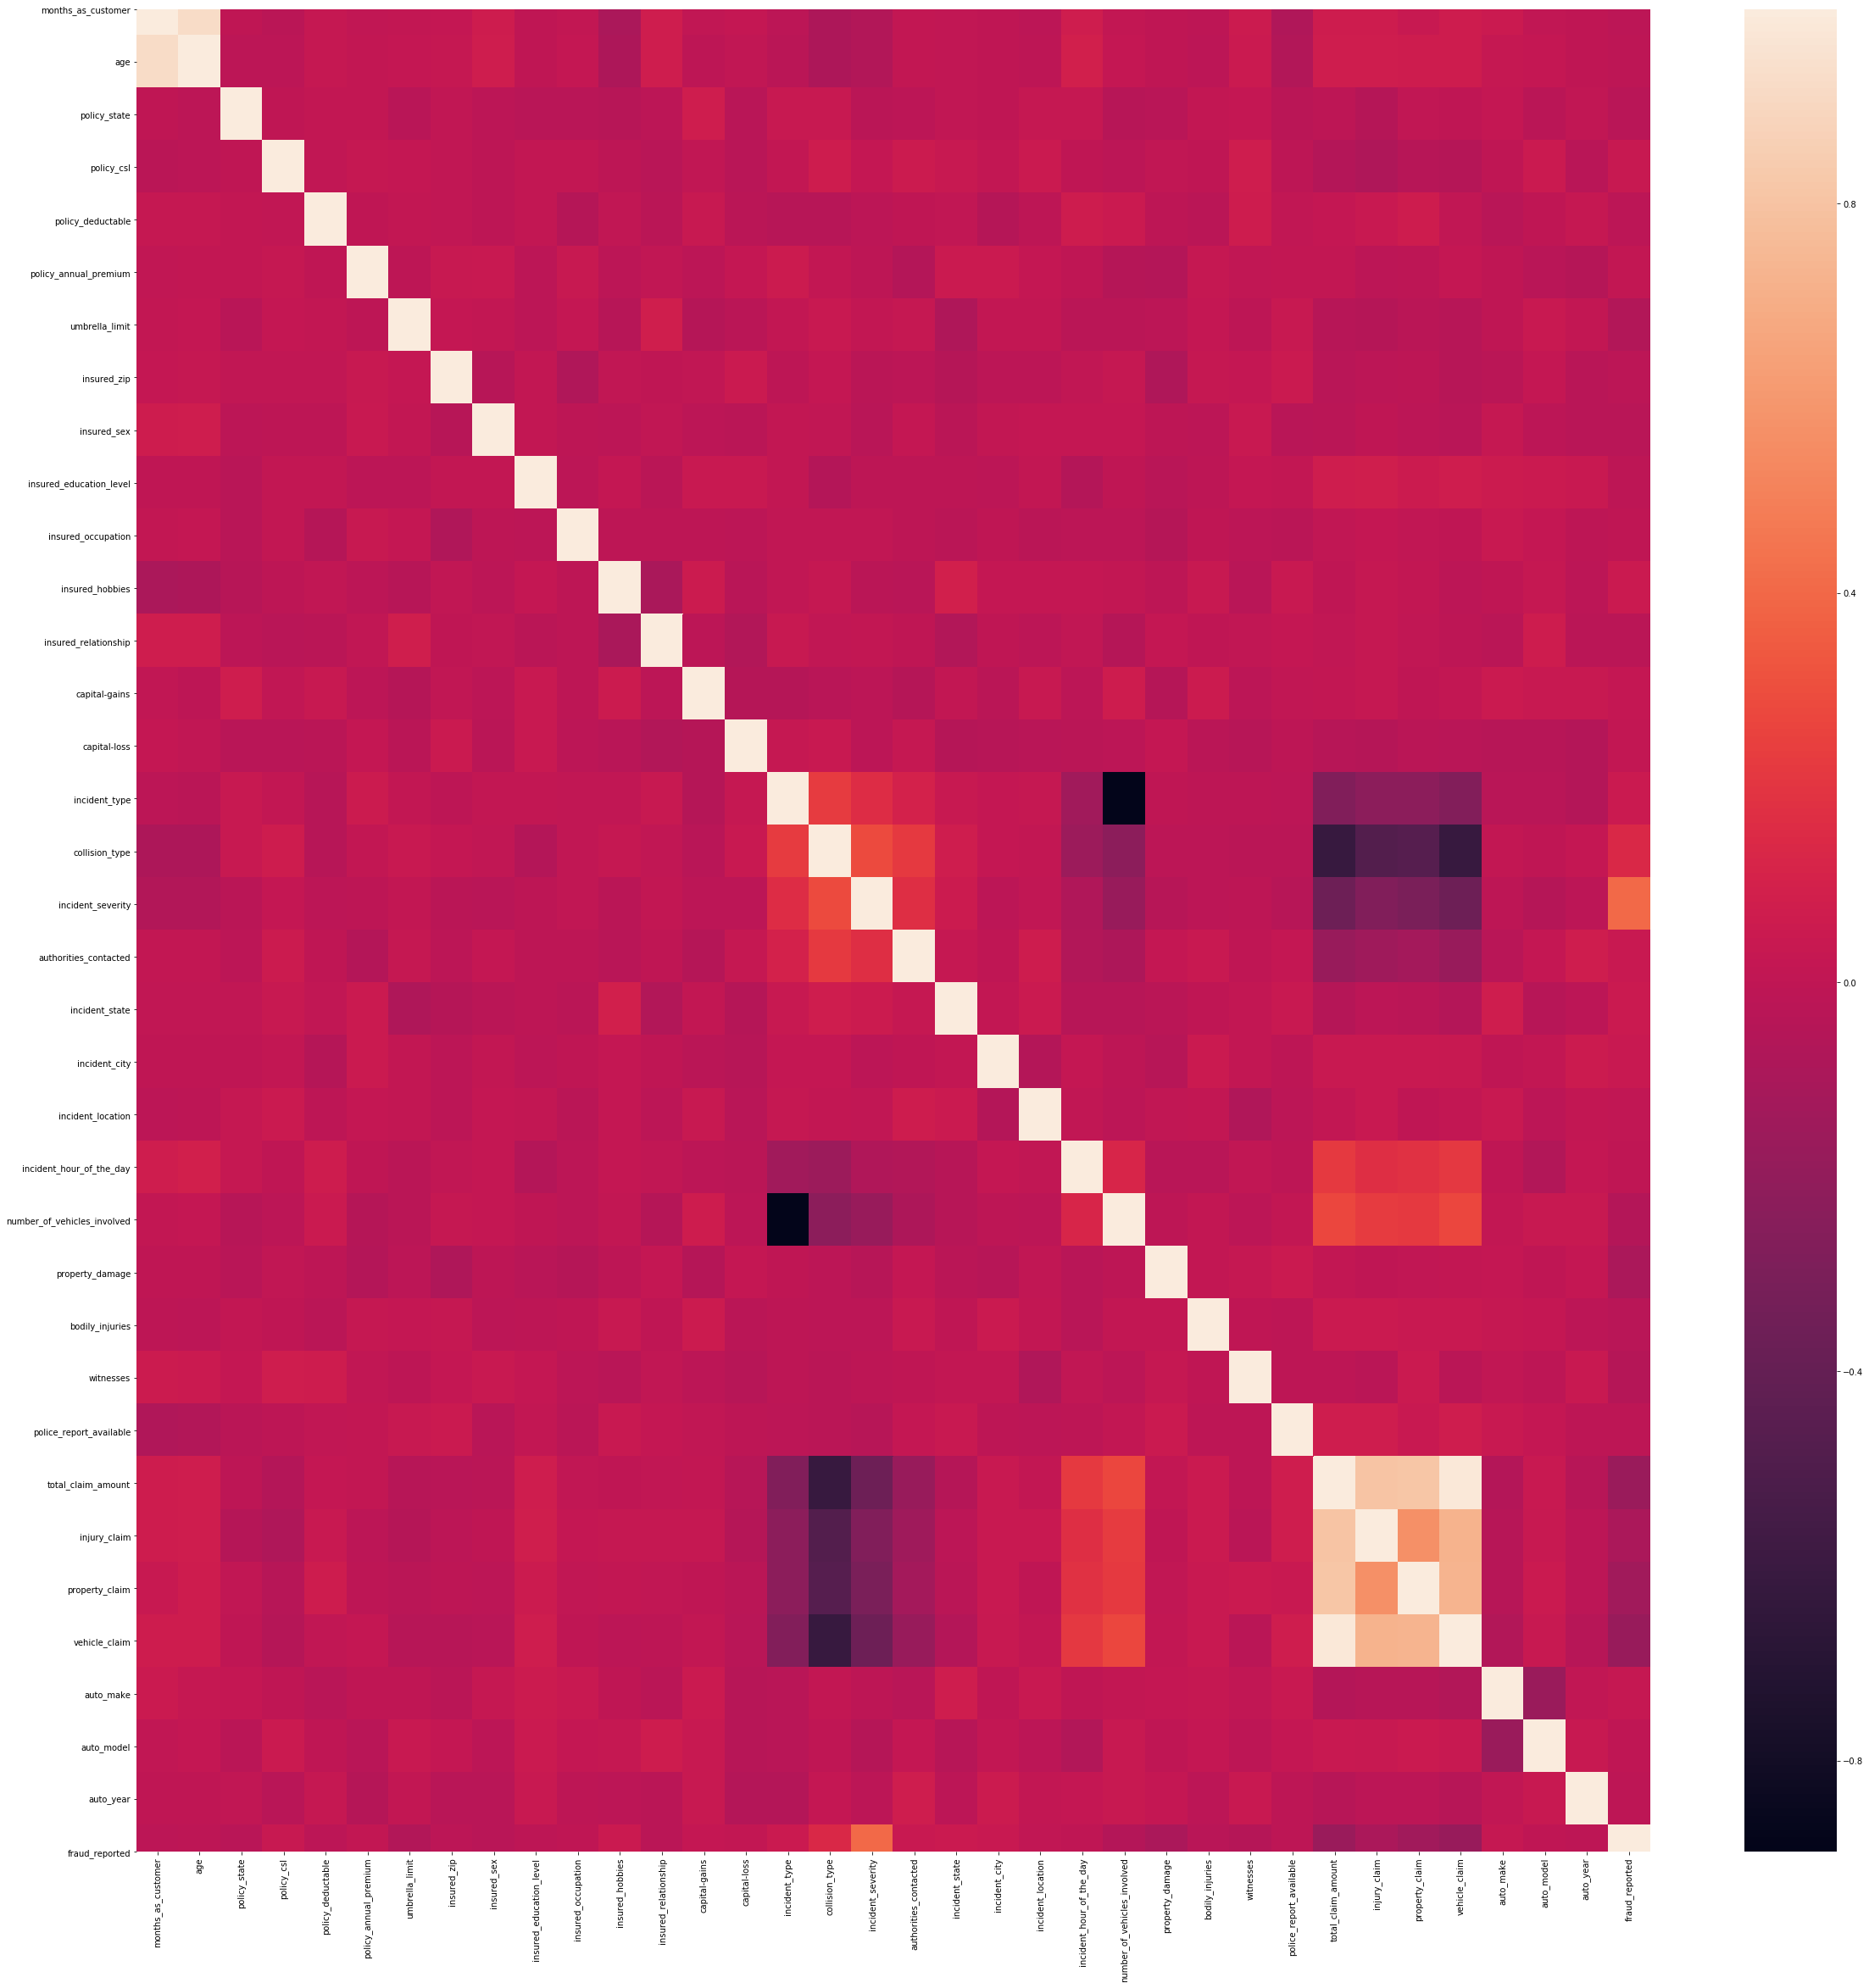

In [49]:
cor=Data.corr()
plt.figure(figsize=(40,40))
sns.heatmap(cor)

In [50]:
cor

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,...,0.058383,-0.071746,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,-0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,...,0.052359,-0.063040,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,-0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,...,0.022960,-0.024713,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,-0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,...,0.071500,-0.007507,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,...,0.066639,0.004936,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,-0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,...,0.002332,0.010332,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,...,-0.006738,0.034177,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,-0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,...,0.019805,0.050983,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,-0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,...,0.042463,-0.029056,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,-0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,...,0.019211,0.016119,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,-0.008808


In [51]:
cor.min()

months_as_customer            -0.093661
age                           -0.086068
policy_state                  -0.046290
policy_csl                    -0.078818
policy_deductable             -0.046733
policy_annual_premium         -0.055191
umbrella_limit                -0.077492
insured_zip                   -0.077921
insured_sex                   -0.036942
insured_education_level       -0.057061
insured_occupation            -0.069077
insured_hobbies               -0.096772
insured_relationship          -0.096772
capital-gains                 -0.047505
capital-loss                  -0.064453
incident_type                 -0.893274
collision_type                -0.618329
incident_severity             -0.365295
authorities_contacted         -0.169710
incident_state                -0.077492
incident_city                 -0.056158
incident_location             -0.068624
incident_hour_of_the_day      -0.156016
number_of_vehicles_involved   -0.893274
property_damage               -0.087639


From all the correlation incident_type is very highly negatively correlated with each other with value -0.893274. So we drop one of them.

In [52]:
Data=Data.drop(['incident_type'],axis=1)
Data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,2,1,71610,6510,13020,52080,10,1,2004,0
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,0,2,5070,780,780,3510,8,12,2007,0
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,3,0,34650,7700,3850,23100,4,30,2007,1
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,2,0,63400,6340,6340,50720,3,34,2014,0
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,1,0,6500,1300,650,4550,0,31,2009,1


# Checking for Outliers and removing them

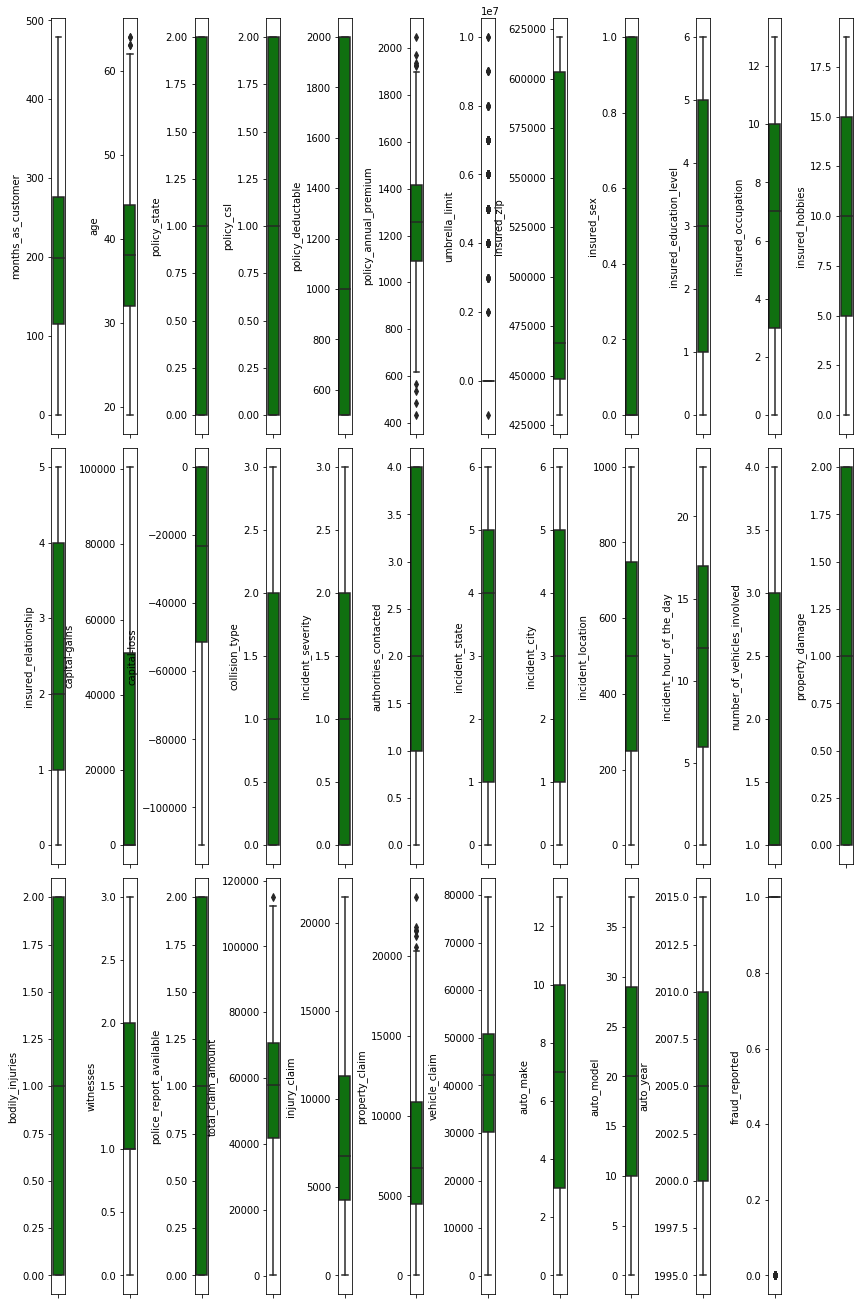

In [53]:
collist=Data.columns.values
col=12
row=10
plt.figure(figsize=(col,5*col))
for i in range(0,len(collist)):
    plt.subplot(row,col,i+1)
    sns.boxplot(Data[collist[i]],color='green',orient='v')
    plt.tight_layout()

Very less outliers are present in 'age','policy_annual_premium' and 'property_claim' lets remove them to get pure data.

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[1.07813958, 0.99083647, 1.18717314, ..., 1.64574255, 0.1834404 ,
        1.74601919],
       [0.2089946 , 0.33407345, 0.01685641, ..., 0.65747047, 0.31549088,
        1.74601919],
       [0.60800168, 1.08891308, 1.18717314, ..., 0.95970204, 0.31549088,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 1.18717314, ..., 0.02857005, 1.5139238 ,
        0.57273139],
       [2.20802805, 2.52328351, 1.22088596, ..., 1.28637088, 1.18130295,
        0.57273139],
       [2.19064515, 2.3043625 , 1.18717314, ..., 0.65747047, 0.31549088,
        0.57273139]])

In [55]:
New_Data=Data[(z<3).all(axis=1)]
New_Data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,2,1,71610,6510,13020,52080,10,1,2004,0
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,0,2,5070,780,780,3510,8,12,2007,0
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,3,0,34650,7700,3850,23100,4,30,2007,1
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,2,0,63400,6340,6340,50720,3,34,2014,0
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,1,0,6500,1300,650,4550,0,31,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,5,...,1,2,87200,17440,8720,61040,6,6,2006,1
996,285,41,0,0,1000,1436.79,0,608177,0,6,...,3,2,108480,18080,18080,72320,13,28,2015,1
997,130,34,2,1,500,1383.49,3000000,442797,0,5,...,3,1,67500,7500,7500,52500,11,19,1996,1
998,458,62,0,2,2000,1356.92,5000000,441714,1,0,...,1,1,46980,5220,5220,36540,1,5,1998,1


In [56]:
New_Data.shape

(980, 35)

20 observations are removed as outliers

# Check the Distribution of Skewness of New_Data

In [57]:
New_Data.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
collision_type                 0.128949
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage               -0.042133
bodily_injuries                0.003757


All features are normally distributed but 'umbrella_limit','insured_zip' are right skewed and 'total_claim_amount','vehicle_claim','fraud_reported' are left skewed. Lets Normalize them.

In [58]:
New_Data['insured_zip']=np.log(New_Data['insured_zip'])

In [59]:
list4=['total_claim_amount','vehicle_claim','fraud_reported']
for i in list4:
    New_Data[i]=np.sqrt(New_Data[i])

In [60]:
New_Data.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.802553
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
collision_type                 0.128949
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage               -0.042133
bodily_injuries                0.003757


In [61]:
New_Data['total_claim_amount']=np.sqrt(New_Data['total_claim_amount'])
New_Data.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.802553
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
collision_type                 0.128949
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage               -0.042133
bodily_injuries                0.003757


In [62]:
df_x=New_Data.iloc[:,0:-1]
df_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1,1000,1406.91,0,13.052224,1,4,...,1,2,1,16.358498,6510,13020,228.210429,10,1,2004
1,228,42,1,1,2000,1197.22,5000000,13.056600,1,4,...,0,0,2,8.438242,780,780,59.245253,8,12,2007
2,134,29,2,0,2000,1413.14,5000000,12.973009,0,6,...,2,3,0,13.643500,7700,3850,151.986842,4,30,2007
3,256,41,0,1,2000,1415.74,6000000,13.318123,0,6,...,1,2,0,15.868004,6340,6340,225.211012,3,34,2014
4,228,44,0,2,1000,1583.91,6000000,13.322371,1,0,...,0,1,0,8.979008,1300,650,67.453688,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,12.974534,0,5,...,0,1,2,17.184192,17440,8720,247.062745,6,6,2006
996,285,41,0,0,1000,1436.79,0,13.318221,0,6,...,2,3,2,18.148361,18080,18080,268.923781,13,28,2015
997,130,34,2,1,500,1383.49,3000000,13.000867,0,5,...,2,3,1,16.118549,7500,7500,229.128785,11,19,1996
998,458,62,0,2,2000,1356.92,5000000,12.998418,1,0,...,0,1,1,14.722388,5220,5220,191.154388,1,5,1998


In [63]:
y=New_Data.iloc[:,-1].values.reshape(-1,1)
y

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [64]:
#Scaleing the training dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.069568,0.983352,1.179821,0.067231,-0.224643,0.620031,-0.467878,-0.456752,1.071971,0.532901,...,0.002498,0.466378,0.006166,0.648170,-0.187627,1.176015,0.703451,0.851959,-1.640447,-0.188594
1,0.202726,0.329711,-0.024580,0.067231,1.412161,-0.248448,1.890767,-0.424492,1.071971,0.532901,...,-1.221626,-1.333033,1.214703,-2.038044,-1.361005,-1.378984,-2.009095,0.355279,-0.651740,0.310476
2,-0.612105,-1.086511,1.179821,-1.175916,1.412161,0.645834,1.890767,-1.040801,-0.932861,1.556905,...,1.226623,1.366083,-1.202371,-0.272641,0.056059,-0.738147,-0.520233,-0.638083,0.966145,0.310476
3,0.445442,0.220771,-1.228980,0.067231,1.412161,0.656603,2.362496,1.503710,-0.932861,1.556905,...,0.002498,0.466378,-1.202371,0.481816,-0.222439,-0.218380,0.655299,-0.886423,1.325675,1.474975
4,0.202726,0.547591,-1.228980,1.310379,-0.224643,1.353117,2.362496,1.535033,1.071971,-1.515109,...,-1.221626,-0.433327,-1.202371,-1.854639,-1.254521,-1.406121,-1.877318,-1.631444,1.056027,0.643190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,-1.747669,-0.106050,1.179821,1.310379,-0.224643,0.221970,-0.467878,-1.029561,-0.932861,1.044903,...,-1.221626,-0.433327,1.214703,0.928211,2.050597,0.278425,1.006104,-0.141402,-1.191035,0.144119
976,0.696826,0.220771,-1.228980,-1.175916,-0.224643,0.743786,-0.467878,1.504437,-0.932861,1.556905,...,1.226623,1.366083,1.214703,1.255216,2.181655,2.232248,1.357058,1.596980,0.786380,1.641332
977,-0.646779,-0.541810,1.179821,0.067231,-1.043045,0.523032,0.947309,-0.835409,-0.932861,1.044903,...,1.226623,1.366083,0.006166,0.566790,0.015103,0.023760,0.718194,1.100300,-0.022562,-1.519450
978,2.196463,2.508513,-1.228980,1.310379,1.412161,0.412986,1.890767,-0.853464,1.071971,-1.515109,...,-1.221626,-0.433327,0.006166,0.093271,-0.451791,-0.452171,0.108558,-1.383104,-1.280917,-1.186736


# Machine Learning to detect Fraud_reported

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
Max_acc_scr=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.25)
    Lr=LogisticRegression()
    Lr.fit(train_x,train_y)
    pred=Lr.predict(test_x)
    acc_scr=accuracy_score(test_y,pred)
    if acc_scr>Max_acc_scr:
        Max_acc_scr=acc_scr
        Final_r_state=r_state
    print('Max Accuracy Score corresponding to  ',Final_r_state,' is ',Max_acc_scr)    

Max Accuracy Score corresponding to   42  is  0.7428571428571429
Max Accuracy Score corresponding to   42  is  0.7428571428571429
Max Accuracy Score corresponding to   42  is  0.7428571428571429
Max Accuracy Score corresponding to   45  is  0.7714285714285715
Max Accuracy Score corresponding to   46  is  0.7795918367346939
Max Accuracy Score corresponding to   46  is  0.7795918367346939
Max Accuracy Score corresponding to   46  is  0.7795918367346939
Max Accuracy Score corresponding to   46  is  0.7795918367346939
Max Accuracy Score corresponding to   46  is  0.7795918367346939
Max Accuracy Score corresponding to   51  is  0.7877551020408163
Max Accuracy Score corresponding to   51  is  0.7877551020408163
Max Accuracy Score corresponding to   51  is  0.7877551020408163
Max Accuracy Score corresponding to   51  is  0.7877551020408163
Max Accuracy Score corresponding to   51  is  0.7877551020408163
Max Accuracy Score corresponding to   56  is  0.7959183673469388
Max Accuracy Score corres

In [67]:
#Checking if the upper model is under or overfitting
a_score=cross_val_score(Lr,x,y,cv=5,scoring='accuracy')
print(a_score)
print(np.mean(a_score))

[0.81122449 0.76020408 0.72959184 0.79591837 0.80102041]
0.7795918367346939


In [68]:
#Model is very less Overfitted i.e managable.

In [69]:
#Final LogisticRegression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=63,test_size=0.25)
Lr=LogisticRegression()
Lr.fit(train_x,train_y)
Lrpred=Lr.predict(test_x)
print('Predicted Fraud Reported',Lrpred)

Predicted Fraud Reported [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0.]


In [70]:
print('Accuracy Score',accuracy_score(test_y,Lrpred))
print('Confusion Matrix \n',confusion_matrix(test_y,Lrpred))
print('Classification Report \n',classification_report(test_y,Lrpred))

Accuracy Score 0.8244897959183674
Confusion Matrix 
 [[ 25  27]
 [ 16 177]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.61      0.48      0.54        52
         1.0       0.87      0.92      0.89       193

    accuracy                           0.82       245
   macro avg       0.74      0.70      0.71       245
weighted avg       0.81      0.82      0.82       245



# Checking the Accuracy through Other Algorithms

In [71]:
from sklearn.svm import SVC
sv=SVC()
param={'kernel':['rbf','poly','linear']}
gd_sr=GridSearchCV(estimator=sv,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'kernel': 'linear'}
0.7564625850340136


In [72]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
param={"criterion":['gini','entropy']}
gd_sr=GridSearchCV(estimator=dt,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'criterion': 'gini'}
0.7687074829931972


In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
param={'n_neighbors':[50,100,150,200,250,300,350,400]}
gd_sr=GridSearchCV(estimator=knn,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_neighbors': 50}
0.7442176870748299


In [74]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(train_x,train_y)
gnpred=gnb.predict(test_x)
print('Accuracy_score ',accuracy_score(test_y,gnpred))

Accuracy_score  0.726530612244898


# Checking the result and score by ensemble methods

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
param={'n_estimators':[50,100,150,200,250,300,350,400]}
gd_sr=GridSearchCV(estimator=rf,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 50}
0.7537414965986394


In [76]:
from sklearn.ensemble import AdaBoostClassifier
Ad=AdaBoostClassifier()
param={'n_estimators':[50,100,150,200,250,300,350,400]}
gd_sr=GridSearchCV(estimator=Ad,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 350}
0.7863945578231293


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
param={'n_estimators':[50,100,150,200,250,300,350,400]}
gd_sr=GridSearchCV(estimator=Ad,param_grid=param,cv=5,scoring='accuracy')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 350}
0.7863945578231293


From all the algorithims like LogisticRegression,SVC,DecisionTreeClassifier,KNeighborsClassifier and Ensembling Methods LogisticRegression has highest accuracy score of 0.8244897959183674(82.44%). So we save the model and its prediction for future use.

In [81]:
test1=np.array([1,2,2,1,7,8,9,112,1,65,6,5,66,8,9,2,2,5,2,0,2,3,6,2,3,4,6,1,3,8,1,3,1,3]).reshape(1,-1)
Lr.predict(test1)

array([0.])

In [83]:
test2=np.array([4,3,6,4,7,9,1,6,3,2,5,4,66,8,9,2,2,5,2,0,2,3,6,2,3,4,6,1,3,8,1,3,1,3]).reshape(1,-1)
Lr.predict(test2)

array([1.])

In [84]:
#Saving the prediction
df=pd.DataFrame(Lrpred)
df.to_csv('Pred_Auto_insurance_fraud.csv')

In [86]:
#Saving the Model for production
from sklearn.externals import joblib
joblib.dump(Lr,'Pred_Auto_insurance_fraud.obj')

C:\Users\Biranchi\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Pred_Auto_insurance_fraud.obj']